In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
covid_data = pd.read_csv('covid_data.csv')

# Print current column names to debug
print("Original columns:", covid_data.columns.tolist())

# Dynamically rename columns if necessary
covid_data.rename(columns={
    'Country/Region': 'country',        # Rename to 'country'
    'Date': 'date',                     # Rename to 'date'
    'Confirmed': 'confirmed_cases',     # Rename to 'confirmed_cases'
    'Deaths': 'deaths',                 # Rename to 'deaths'
    'Recovered': 'recoveries'           # Rename to 'recoveries'
}, inplace=True)

# Check the renamed columns
print("Renamed columns:", covid_data.columns.tolist())

# Convert 'date' to datetime format
covid_data['date'] = pd.to_datetime(covid_data['date'])

# Sort by date
covid_data.sort_values('date', inplace=True)

# ----- Daily Aggregated Time Series -----
daily_data = covid_data.groupby('date').agg({
    'confirmed_cases': 'sum',
    'deaths': 'sum',
    'recoveries': 'sum'
}).reset_index()

# Plot confirmed cases
plt.figure(figsize=(10, 5))
plt.plot(daily_data['date'], daily_data['confirmed_cases'], label='Confirmed Cases', color='blue')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Daily Confirmed COVID-19 Cases')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot deaths
plt.figure(figsize=(10, 5))
plt.plot(daily_data['date'], daily_data['deaths'], label='Deaths', color='red')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Daily COVID-19 Deaths')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot recoveries
plt.figure(figsize=(10, 5))
plt.plot(daily_data['date'], daily_data['recoveries'], label='Recoveries', color='green')
plt.xlabel('Date')
plt.ylabel('Recoveries')
plt.title('Daily COVID-19 Recoveries')
plt.grid(True)
plt.tight_layout()
plt.show()

# ----- Time Series Decomposition -----
# Apply decomposition if there are enough data points
if len(daily_data) >= 14:
    decomposition = seasonal_decompose(daily_data['confirmed_cases'], model='additive', period=7)

    plt.figure(figsize=(10, 8))
plt.subplot(411)
    plt.plot(decomposition.observed, label='Original')
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend', color='orange')
    plt.legend(loc='upper left')
    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Seasonality', color='green')
    plt.legend(loc='upper left')
    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residuals', color='gray')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("Not enough data points for seasonal decomposition (need at least 14).")

# ----- Country Comparison -----
country_cases = covid_data.groupby('country')['confirmed_cases'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
country_cases.head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Countries by Total Confirmed COVID-19 Cases')
plt.xlabel('Country')
plt.ylabel('Total Confirmed Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


IndentationError: unexpected indent (2664772944.py, line 74)

In [2]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Original columns: ['Country/Region', 'Date', 'Confirmed', 'Deaths', 'Recovered']
Renamed columns: ['country', 'date', 'confirmed_cases', 'deaths', 'recoveries']


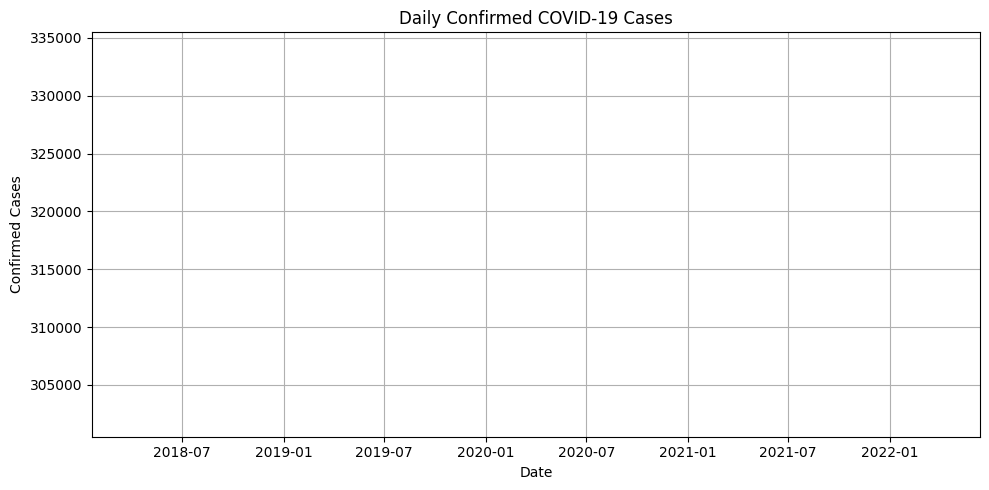

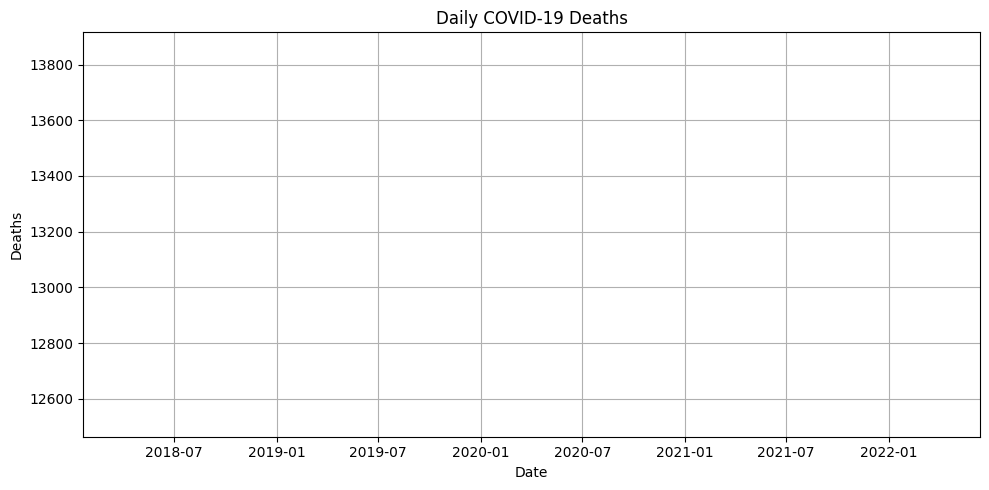

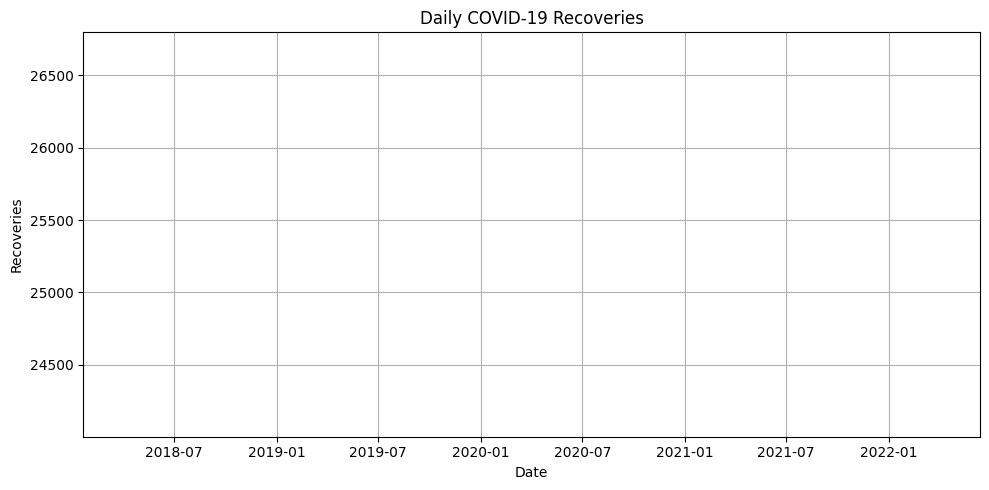

Not enough data points for seasonal decomposition (need at least 14).


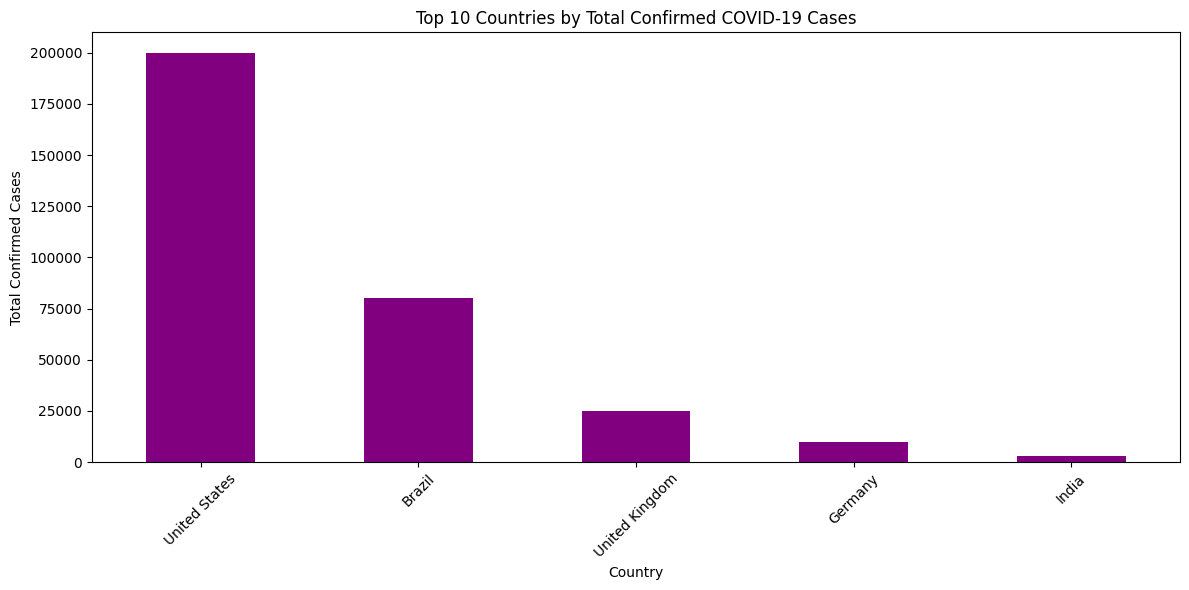

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

covid_data = pd.read_csv('covid_data.csv')

print("Original columns:", covid_data.columns.tolist())

covid_data.rename(columns={
    'Country/Region': 'country',        
    'Date': 'date',                     
    'Confirmed': 'confirmed_cases',     
    'Deaths': 'deaths',                 
    'Recovered': 'recoveries'           
}, inplace=True)

print("Renamed columns:", covid_data.columns.tolist())

covid_data['date'] = pd.to_datetime(covid_data['date'])

covid_data.sort_values('date', inplace=True)

daily_data = covid_data.groupby('date').agg({
    'confirmed_cases': 'sum',
    'deaths': 'sum',
    'recoveries': 'sum'
}).reset_index()

plt.figure(figsize=(10, 5))
plt.plot(daily_data['date'], daily_data['confirmed_cases'], label='Confirmed Cases', color='blue')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Daily Confirmed COVID-19 Cases')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(daily_data['date'], daily_data['deaths'], label='Deaths', color='red')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Daily COVID-19 Deaths')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(daily_data['date'], daily_data['recoveries'], label='Recoveries', color='green')
plt.xlabel('Date')
plt.ylabel('Recoveries')
plt.title('Daily COVID-19 Recoveries')
plt.grid(True)
plt.tight_layout()
plt.show()

if len(daily_data) >= 14:
    decomposition = seasonal_decompose(daily_data['confirmed_cases'], model='additive', period=7)

    plt.figure(figsize=(10, 8))
    plt.subplot(411)
    plt.plot(decomposition.observed, label='Original')
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend', color='orange')
    plt.legend(loc='upper left')
    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Seasonality', color='green')
    plt.legend(loc='upper left')
    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residuals', color='gray')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("Not enough data points for seasonal decomposition (need at least 14).")

country_cases = covid_data.groupby('country')['confirmed_cases'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
country_cases.head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Countries by Total Confirmed COVID-19 Cases')
plt.xlabel('Country')
plt.ylabel('Total Confirmed Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

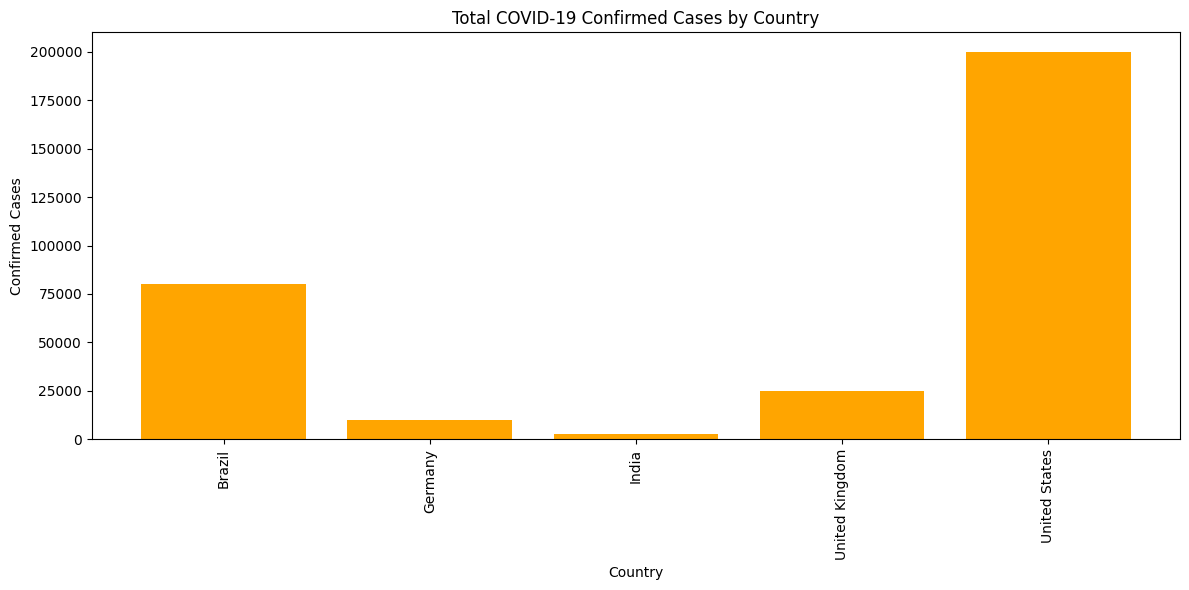

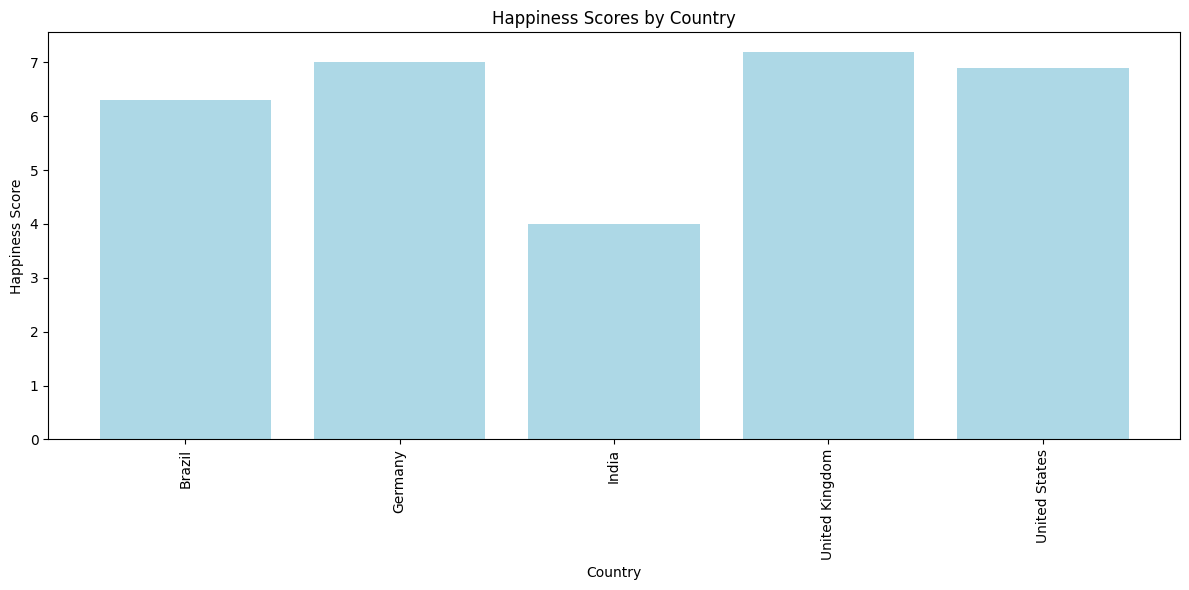

Correlation between COVID-19 confirmed cases and happiness score: 0.3445
Regression coefficient: [8.45698602e-06]
Intercept: 5.448812076507418
R² score: Not defined (test set has less than 2 samples)


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

covid_data = pd.read_csv('covid_data.csv')
happiness_data = pd.read_csv('happiness_data.csv')

covid_data.columns = covid_data.columns.str.lower().str.strip()
happiness_data.columns = happiness_data.columns.str.lower().str.strip()

covid_country_col = [col for col in covid_data.columns if 'country' in col][0]
happiness_country_col = [col for col in happiness_data.columns if 'country' in col][0]
covid_data.rename(columns={covid_country_col: 'country'}, inplace=True)
happiness_data.rename(columns={happiness_country_col: 'country'}, inplace=True)

for col in covid_data.columns:
    if 'confirm' in col:
        covid_data.rename(columns={col: 'confirmed_cases'}, inplace=True)

if 'confirmed_cases' not in covid_data.columns:
    raise KeyError("Column 'confirmed_cases' not found in COVID dataset.")

covid_summary = covid_data.groupby('country', as_index=False)['confirmed_cases'].sum()

numeric_cols = happiness_data.select_dtypes(include=[np.number]).columns
happiness_data[numeric_cols] = happiness_data[numeric_cols].fillna(happiness_data[numeric_cols].mean())

merged_data = pd.merge(covid_summary, happiness_data, on='country', how='inner')

if merged_data.shape[0] < 2:
    raise ValueError("Not enough data to perform regression. Ensure both datasets contain multiple overlapping countries.")
    
plt.figure(figsize=(12, 6))
plt.bar(merged_data['country'], merged_data['confirmed_cases'], color='orange')
plt.xticks(rotation=90)
plt.title('Total COVID-19 Confirmed Cases by Country')
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(merged_data['country'], merged_data['happiness_score'], color='lightblue')
plt.xticks(rotation=90)
plt.title('Happiness Scores by Country')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.tight_layout()
plt.show()

correlation = merged_data['confirmed_cases'].corr(merged_data['happiness_score'])
print(f"Correlation between COVID-19 confirmed cases and happiness score: {correlation:.4f}")

X = merged_data[['confirmed_cases']]
y = merged_data['happiness_score']

if len(merged_data) >= 3:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Regression coefficient:", model.coef_)
    print("Intercept:", model.intercept_)

    if len(y_test) > 1:
        print("R² score:", model.score(X_test, y_test))
    else:
        print("R² score: Not defined (test set has less than 2 samples)")
else:
    # Use the full dataset for fitting
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    print("Not enough data to split. Using all data for training.")
    print("Regression coefficient:", model.coef_)
    print("Intercept:", model.intercept_)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

covid_data = pd.read_csv('covid_data.csv')
happiness_data = pd.read_csv('happiness_data.csv')

covid_data.columns = covid_data.columns.str.lower().str.strip()
happiness_data.columns = happiness_data.columns.str.lower().str.strip()

covid_country_col = [col for col in covid_data.columns if 'country' in col][0]
happiness_country_col = [col for col in happiness_data.columns if 'country' in col][0]
covid_data.rename(columns={covid_country_col: 'country'}, inplace=True)
happiness_data.rename(columns={happiness_country_col: 'country'}, inplace=True)

if 'date' in covid_data.columns:
    covid_data['date'] = pd.to_datetime(covid_data['date'], errors='coerce')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

covid_data = pd.read_csv('covid_data.csv')
happiness_data = pd.read_csv('happiness_data.csv')

covid_data.columns = covid_data.columns.str.lower().str.strip()
happiness_data.columns = happiness_data.columns.str.lower().str.strip()

covid_country_col = [col for col in covid_data.columns if 'country' in col][0]
happiness_country_col = [col for col in happiness_data.columns if 'country' in col][0]
covid_data.rename(columns={covid_country_col: 'country'}, inplace=True)
happiness_data.rename(columns={happiness_country_col: 'country'}, inplace=True)

if 'date' in covid_data.columns:
    covid_data['date'] = pd.to_datetime(covid_data['date'], errors='coerce')